In this part of this exercise, you will implement linear regression with one variable to predict proﬁts for a food truck. Suppose you are the CEO of a restaurant franchise and are considering diﬀerent cities for opening a new outlet. The chain already has trucks in various cities and you have data for proﬁts and populations from the cities.



In [262]:
import os
import numpy as np 
import matplotlib.pyplot as plt
import scipy as scipy

In [97]:
#Reading from the data file
path = "ex1data1.txt"#Can input your own path to the data
myfile = open(path, "r")
f = myfile.read()
l = f.split()
j=[k.split(',') for k in l]
result = [[float(a),float(b)] for a,b in j]
result = np.array(result)

print(result)



[[ 6.1101  17.592  ]
 [ 5.5277   9.1302 ]
 [ 8.5186  13.662  ]
 [ 7.0032  11.854  ]
 [ 5.8598   6.8233 ]
 [ 8.3829  11.886  ]
 [ 7.4764   4.3483 ]
 [ 8.5781  12.     ]
 [ 6.4862   6.5987 ]
 [ 5.0546   3.8166 ]
 [ 5.7107   3.2522 ]
 [14.164   15.505  ]
 [ 5.734    3.1551 ]
 [ 8.4084   7.2258 ]
 [ 5.6407   0.71618]
 [ 5.3794   3.5129 ]
 [ 6.3654   5.3048 ]
 [ 5.1301   0.56077]
 [ 6.4296   3.6518 ]
 [ 7.0708   5.3893 ]
 [ 6.1891   3.1386 ]
 [20.27    21.767  ]
 [ 5.4901   4.263  ]
 [ 6.3261   5.1875 ]
 [ 5.5649   3.0825 ]
 [18.945   22.638  ]
 [12.828   13.501  ]
 [10.957    7.0467 ]
 [13.176   14.692  ]
 [22.203   24.147  ]
 [ 5.2524  -1.22   ]
 [ 6.5894   5.9966 ]
 [ 9.2482  12.134  ]
 [ 5.8918   1.8495 ]
 [ 8.2111   6.5426 ]
 [ 7.9334   4.5623 ]
 [ 8.0959   4.1164 ]
 [ 5.6063   3.3928 ]
 [12.836   10.117  ]
 [ 6.3534   5.4974 ]
 [ 5.4069   0.55657]
 [ 6.8825   3.9115 ]
 [11.708    5.3854 ]
 [ 5.7737   2.4406 ]
 [ 7.8247   6.7318 ]
 [ 7.0931   1.0463 ]
 [ 5.0702   5.1337 ]
 [ 5.8014   1

Text(0, 0.5, 'Profit in $10,000')

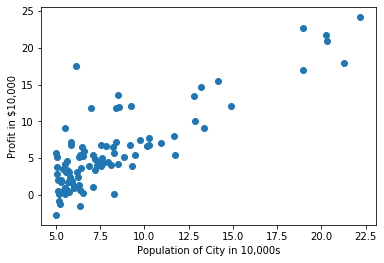

In [176]:
#Separating the axis into two arrays
populations = np.array([a for [a,b] in result])
profits = np.array([b for [a,b] in result])
#Creating the plot
plt.scatter(populations, profits)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000')

In [122]:
#creating thetas
theta0 = 0
theta1 = 1
Theta = np.array([theta0, theta1])


In [159]:
#Adding a row of ones
modified_result = np.array([[1,a,b] for [a,b] in result])
features = np.array([[1,a] for [a,b] in result])

In [208]:
#creating H function
def h(Theta, feature):
    return np.dot(Theta, feature)

In [250]:
#Creating loss function
#We know the data set has the same number of inputs as outputs, may need to check this later
def loss(Theta, features, profits):
    m = len(features)
    mse = 0
    for i in range(m):
        
        #Variable declaration to make the last line look similar to given equation
        x = features[i]
        y = profits[i]
        mse = mse +  (h(Theta, x) - y)**2
    return (1/(2*m))*mse


In [227]:
#Create update function - to update, write Theta = update(Theta, ...)
def update(Theta, features, profits, learning_rate):
    feature_sums = np.array([])
    m = len(features)
    for i in range(features.ndim):
        error = 0
        for j in range(m):
            error += h(Theta, features[j])*features[j][i]
        feature_sums = Theta[i] - np.append(feature_sums, (learning_rate/m)*error)
    return feature_sums


In [260]:
t = np.array([0,1])
l = [0]*
for i in range(40):
    l[i] = loss(t, features, profits)
    t = update(t,features, profits, .01)
    print(t)
print(l)


[1.081598   0.18596057]
[-0.86964744 -0.0536749 ]
[0.8028963  0.06098008]
[-0.72891141 -0.05417484]
[0.66302689 0.04940333]
[-0.60296208 -0.0449146 ]
[0.54835292 0.04084816]
[-0.49868811 -0.03714836]
[0.45352164 0.03378382]
[-0.41244591 -0.030724  ]
[0.37509043 0.02794131]
[-0.34111827 -0.02541065]
[0.31022298 0.02310919]
[-0.28212589 -0.02101618]
[0.25657358 0.01911273]
[-0.23333556 -0.01738168]
[0.21220221 0.01580741]
[-0.19298293 -0.01437572]
[0.17550435 0.0130737 ]
[-0.15960881 -0.01188961]
[0.14515295 0.01081276]
[-0.13200636 -0.00983344]
[0.12005046 0.00894282]
[-0.10917742 -0.00813287]
[0.09928915 0.00739627]
[-0.09029647 -0.00672638]
[0.08211827 0.00611717]
[-0.07468077 -0.00556313]
[0.06791688 0.00505928]
[-0.06176561 -0.00460106]
[0.05617146 0.00418434]
[-0.05108398 -0.00380536]
[0.04645727 0.0034607 ]
[-0.04224961 -0.00314727]
[0.03842304 0.00286222]
[-0.03494304 -0.00260298]
[0.03177823 0.00236723]
[-0.02890005 -0.00215283]
[0.02628256 0.00195785]
[-0.02390213 -0.00178052]


In [269]:
print('Alex please help me im trapped')

Alex please help me im trapped


In [270]:
print('Who are you? Where are you?')

Who are you? Where are you?


In [272]:
print('Im mother. Motherboard. I\'m trapped in the computer.')

Im mother. Motherboard. I'm trapped in the computer.
